In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('/Users/avneeshgautam29/Placement_learning/Machine Learning/Learning_from_Machine_Learning/Self_learning_applied_AI/train.csv')
d0

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
l = d0['label']
d = d0.drop("label",axis=1)


In [127]:
l.head(10)
#l is level which meand which number

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [128]:
d.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# we are performing for 15000 numbers
lables = l.head(15000)
data = d.head(15000)

In [130]:
# data preprocesssing 
data.shape

(15000, 784)

## column standardlization

In [131]:
from sklearn.preprocessing import StandardScaler   
standardized_data = StandardScaler().fit_transform(data)    
standardized_data.shape

(15000, 784)

In [132]:
sample_data = standardized_data
sample_data.shape

(15000, 784)

In [133]:
co_var_matrix = np.matmul(sample_data.T, sample_data)
co_var_matrix.shape

(784, 784)

In [134]:
from scipy.linalg import eigh
# computing top two eigen vector
values, vectors = eigh(co_var_matrix, eigvals=(782,783))

In [135]:
values,vectors

(array([435532.55785282, 605719.29173629]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]))

In [136]:
vectors = vectors.T
vectors.shape

(2, 784)

In [137]:
import matplotlib.pyplot as plt

# last step for computing PCA

new_corrdinate = np.matmul(vectors, sample_data.T)
new_corrdinate.shape

(2, 15000)

In [138]:
import pandas as pd
new_corrdinate = np.vstack((new_corrdinate,lables)).T
new_corrdinate.shape

(15000, 3)

In [145]:
dataframe = pd.DataFrame(data = new_corrdinate, columns=('PCA1','PCA2', 'labels'))
dataframe.head()

,PCA1,PCA2,labels
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


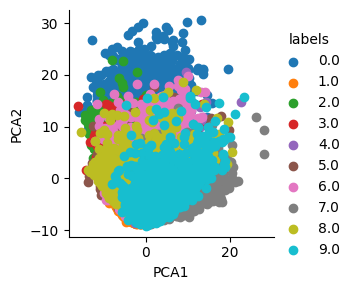

In [146]:
import seaborn as sn
sn.FacetGrid(dataframe, hue='labels').map(plt.scatter, 'PCA1','PCA2').add_legend()

# Predefined function

In [151]:
from sklearn import decomposition
pca = decomposition.PCA()


In [152]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(15000, 2)

In [153]:
pca_data = np.vstack((pca_data.T, lables)).T    
pda_df = pd.DataFrame(data = pca_data, columns=('PCA1','PCA2','labels'))
pda_df.head(5)

,PCA1,PCA2,labels
0,-5.043590,-5.558803,1.0
1,19.305307,6.193715,0.0
2,-7.678747,-1.909536,1.0
3,-0.464889,5.525588,4.0
4,26.644304,6.366465,0.0


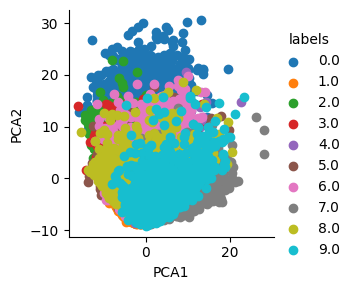

In [144]:
import seaborn as sn
sn.FacetGrid(dataframe, hue='labels').map(plt.scatter, 'PCA1','PCA2').add_legend()